# Análisis del uso de las aulas virtuales UIS

## Estadística
### Unidad I: Estadística descriptiva
**Prof. Eliana Bonalde**

___

Algunos métodos para la manipulación y análisis del conjunto de datos de las aulas virtuales. 

Importamos las librerías a utilizar y el archivo en formato .CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_D2.csv") 

Pedimos información sobre el DataFrame

In [3]:
#tamaño del archivo
df.shape

(20, 24)

In [4]:
#primeras y las últimas filas del DataFrame, respectivamente.
df.head()
#df.tail()

Marca temporal                       Nombre  \
0  9/08/2021 11:59:57         Jhordanrh Villamizar   
1  9/08/2021 12:02:09               David Vasquez    
2  9/08/2021 12:02:57                  David Gallo   
3  9/08/2021 12:02:58  Daniel Alejandro Leon Ortiz   
4  9/08/2021 12:06:36         Yuliana Acevedo Vila   

   ¿Qué porcentaje aproximado de sus cursos han tenido el apoyo de las aulas virtuales del Moodle antes de la presencialidad remota?  \
0                                                 80                                                                                   
1                                                 40                                                                                   
2                                                 60                                                                                   
3                                                 80                                                                                   
4                                                 10                                                                                   

   ¿Qué porcentaje aproximado de sus cursos han tenido el apoyo de las aulas virtuales del Moodle durante la presencialidad remota?  \
0                                               80.0                                                                                  
1                                               40.0                                                                                  
2                                               80.0                                                                                  
3                                               80.0                                                                                  
4                                               90.0                                                                                  

  ¿Las aulas virtuales solo contienen la información básica del curso?  \
0     No, contiene información adicional a lo básico                     
1     No, contiene información adicional a lo básico                     
2     No, contiene información adicional a lo básico                     
3     No, contiene información adicional a lo básico                     
4     No, contiene información adicional a lo básico                     

  ¿Los profesores incluyen materiales de las clases en ellas?  \
0                                                 Si            
1                                                 Si            
2                                                 Si            
3                                                 Si            
4                                                 Si            

  ¿Cuáles de los siguientes elementos incluyen sus aulas virtuales?  \
0                        Vídeos, Imágenes, Artículos                  
1                        Vídeos, Imágenes, Artículos                  
2  Vídeos, Imágenes, Artículos, Películas, Quices...                  
3                                   Vídeos, Imágenes                  
4                        Vídeos, Imágenes, Artículos                  

  ¿Hacen actividades por medio de ella?  \
0                                    Si   
1                                    Si   
2                                    No   
3                                    Si   
4                                    Si   

  ¿Cuáles de los siguientes actividades realizan en sus aulas virtuales?  \
0                 Foros, Encuestas, Tareas, Talleres                       
1  Cuestionarios, Foros, Encuestas, Tareas, Talleres                       
2  Cuestionarios, Foros, Encuestas, Tareas, Juego...                       
3         Cuestionarios, Encuestas, Tareas, Talleres                       
4  Cuestionarios, Foros, Encuestas, Tareas, Talleres                       

  ¿Usan la mensajería de las aulas virtuales para comunicarse fuera de las 

In [5]:
df.shape

(20, 24)

Eliminamos las columnas que no son necesarias

In [6]:
df = df.drop(['Marca temporal', 'Nombre'], axis=1)

Renombramos las columnas

In [7]:
df.columns = ['Apoyo antes', 'Apoyo durante', 'Informacion adicional', 'Materiales incluidos', 'Elementos incluidos',
              'Realizacion actividades', 'Actividades realizadas', 'Mensajeria', 'Plataforma adicional', 
              'Material Adicional', 'Material de clases', 'Material audiovisual', 'Material academico', 
              'Ocio', 'Encuentra', 'Uso', 'Encuentra', 'Area mas util', 'Mejor aula virtual', 'Anadir elementos', 
              'Tipo de preguntas', 'Evaluaciones por fuera'] 
df.head(1) #muestra solo la primera fila

Apoyo antes  Apoyo durante                           Informacion adicional  \
0           80           80.0  No, contiene información adicional a lo básico   

  Materiales incluidos          Elementos incluidos Realizacion actividades  \
0                   Si  Vídeos, Imágenes, Artículos                      Si   

               Actividades realizadas Mensajeria    Plataforma adicional  \
0  Foros, Encuestas, Tareas, Talleres         Sí  No uso otra plataforma   

   Material Adicional  ...  Material academico  Ocio  Encuentra  \
0                   4  ...                   3     2          1   

                                                 Uso  \
0  Para presentar las pruebas del curso en cuesti...   

                                           Encuentra  \
0  Material audiovisual relacionado con el área e...   

                                       Area mas util Mejor aula virtual  \
0  Ciencias básicas (matemáticas, física, química...   Bases de datos 2   

  Anadir elementos Tipo de preguntas Evaluaciones por fuera  
0             Nadq       Seleccionar                      4  

[1 rows x 22 columns]

Pedimos información sobre los datos (filas y columnas)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Apoyo antes              20 non-null     int64  
 1   Apoyo durante            20 non-null     float64
 2   Informacion adicional    20 non-null     object 
 3   Materiales incluidos     20 non-null     object 
 4   Elementos incluidos      20 non-null     object 
 5   Realizacion actividades  20 non-null     object 
 6   Actividades realizadas   20 non-null     object 
 7   Mensajeria               20 non-null     object 
 8   Plataforma adicional     20 non-null     object 
 9   Material Adicional       20 non-null     int64  
 10  Material de clases       20 non-null     int64  
 11  Material audiovisual     20 non-null     int64  
 12  Material academico       20 non-null     int64  
 13  Ocio                     20 non-null     int64  
 14  Encuentra                20 

No hay datos nulos, en caso de haberlo podríamos utilizar la siguiente celda para eliminar las filas que los contengan (está comentada).

In [9]:
#eliminar las filas que contengan datos nulos
#df = df.dropna(axis=0) 

Pedimos los valores filas por columnas.

In [10]:
df['Informacion adicional'].unique()

array(['No, contiene información adicional a lo básico', 'Si'],
      dtype=object)

Adicionalmente, podemos cambiar los valores de las columnas. Por ejemplo, en la pregunta: ¿Las aulas virtuales solo contienen la información básica del curso? las respuestas son: 
- 'No, contiene información adicional a lo básico', 
- 'Si'

Ahora bien, si la cambiamos a 'Informacion adicional'
- 'Si' representaría que si contiene información adicional, es decir, 'No, contiene información adicional a lo básico'
- 'No' representaría que no contiene informacional adicional, es decir, 'Si' de la pregunta original. 

In [11]:
#cambiar valores
df.replace({'Informacion adicional': {'No, contiene información adicional a lo básico':'Si contiene', 'Si':'No contiene'}}, inplace=True)

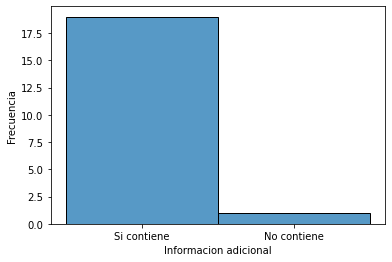

In [25]:
sns.histplot(data=df, x='Informacion adicional')
plt.ylabel('Frecuencia')
plt.show()

### Uso de las aulas antes y después (Gráfica de caja)

In [16]:
print(df['Apoyo antes'].mean()) #imprimir la media del procentaje de uso de las aulas antes de la pandemia
print(df['Apoyo durante'].mean()) #imprimir la media del procentaje de uso de las aulas durante la pandemia

44.75
64.857


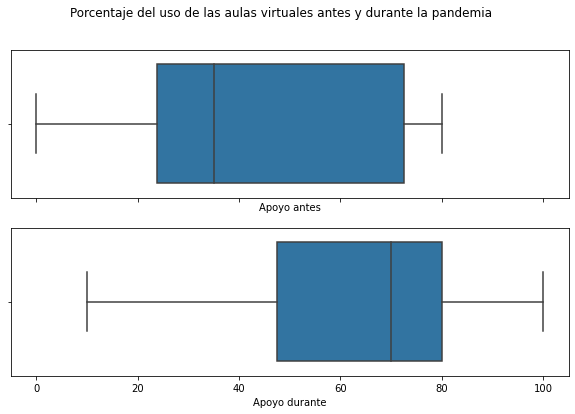

In [29]:
fig, axes = plt.subplots(2, sharex=True, figsize=(10,6)) #2 graficas, compartir el eje x

sns.boxplot(x = df['Apoyo antes'],  orient="h", ax=axes[0])
sns.boxplot(x = df['Apoyo durante'],  orient="h", ax=axes[1])

plt.suptitle("Porcentaje del uso de las aulas virtuales antes y durante la pandemia")
plt.show()

In [19]:
df['Area mas util'].unique()

array(['Ciencias básicas (matemáticas, física, química, biología)',
       'Materias de carrera básicas', 'Electivas',
       'Materias de carrera especializadas'], dtype=object)

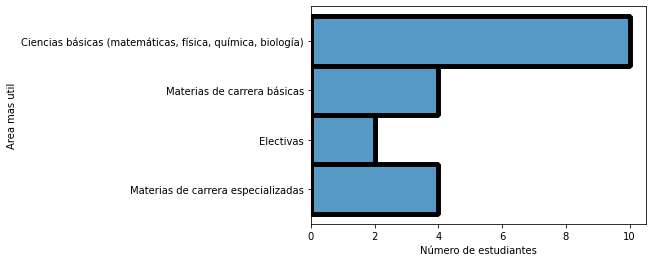

In [26]:
sns.histplot(data=df, y="Area mas util")
plt.xlabel('Número de estudiantes')
plt.show()